# Data Mining Assignment 2

## Task 1: Marketing data

In [75]:
import datetime

import pandas as pd

# read in file
df = pd.read_csv('data/company_data.csv')

# check how the data looks
print(df.head())
# check data types
print(df.dtypes)

   customerNr  year_of_birth   education marital_status      income  kids  \
0        1826           1970  Graduation       Divorced  $84,835.00     0   
1           1           1961  Graduation         Single  $57,091.00     0   
2       10476           1958  Graduation        Married  $67,267.00     0   
3        1386           1967  Graduation       Together  $32,474.00     1   
4        5371           1989  Graduation         Single  $21,474.00     1   

   teens customer_since  last_purchase_in_days  web_purchases  \
0      0        6/16/14                      0              4   
1      0        6/15/14                      0              7   
2      1        5/13/14                      0              3   
3      1        5/11/14                      0              1   
4      0         4/8/14                      0              3   

   catalog_purchases  store_purchases  web_visits  campaign3  campaign4  \
0                  4                6           1          0          0

### 1.1 The distribution of the age within each marital status

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


<AxesSubplot:title={'center':'age'}, xlabel='marital_status'>

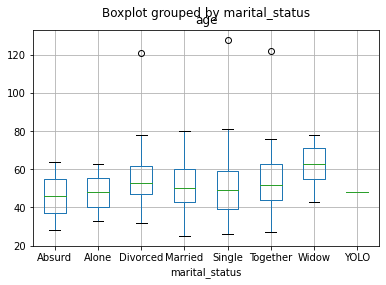

In [76]:
# calculate age with respect to year of birth and add new col to dataframe
now = datetime.datetime.now()
current_year = now.year

df['age'] = current_year - df.year_of_birth

# find out the different marital statuses in the data frame
unique_marital_status = df.marital_status.unique()
print(unique_marital_status)

# create boxplots for each
df[['marital_status', 'age']].boxplot(by='marital_status', column='age')

### 1.2 What is the distribution of the education?

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64


<AxesSubplot:>

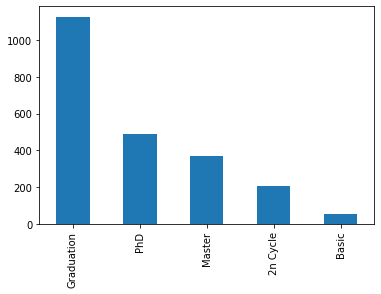

In [77]:
edu_distr = df.education.value_counts()
print(edu_distr)
edu_distr.plot(kind='bar')

### 1.3 Which country has the most web purchases?


web_purchases    4382
Name: SP, dtype: int64


<AxesSubplot:xlabel='country'>

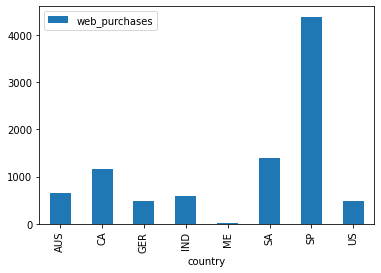

In [78]:
wp_per_country = df[['web_purchases', 'country']].groupby('country').sum()
print(wp_per_country.loc[wp_per_country['web_purchases'].idxmax()])
wp_per_country.plot(kind='bar')

### 1.4 How does the average customer look like?

In [141]:
from datetime import timedelta

# birthyear
avg_year = df.year_of_birth.mean()
print('Birthyear: ' + str(round(avg_year, 0)))

# age
avg_age = df.age.mean()
print('Age: ' + str(round(avg_age, 0)))

# education
max_edu = edu_distr.idxmax()
print('Education: ' + str(max_edu))

# marital status
# get max count marital status value
ms_distr = df.marital_status.value_counts()
max_ms = ms_distr.idxmax()
print('Marital Status: ' + str(max_ms))

# income
# convert objects to floats
df['income_float'] = df.income.str.replace('[\$,]', '', regex=True).astype(float)
# calc mean
avg_inc = df.income_float.mean()
print('Income: ' + str(round(avg_inc, 2)))

# kids
avg_kids = df.kids.mean()
print('Kids: ' + str(round(avg_kids, 2)))

# teens
avg_teens = df.teens.mean()
print('Teens: ' + str(round(avg_teens, 2)))

# customer since
# convert objects to datetime
df['customer_since_date_obj'] = pd.to_datetime(df.customer_since)
# calc days of customership since date
days_cust_since_today_df = (now - df.customer_since_date_obj).dt.days
# avg days
avg_d_cust_since = round(days_cust_since_today_df.mean(), 0)
# calc back to date
avg_date_cust_since = now - timedelta(avg_d_cust_since)
print('Customer since: ' + str(avg_date_cust_since.strftime('%d.%m.%Y')))

# last purchase in days
avg_purch_in_days = df.last_purchase_in_days.mean()
print('Last purchase in days: ' + str(round(avg_purch_in_days, 2)))

# web purchases
avg_web_purch = df.web_purchases.mean()
print('Web purchases: ' + str(round(avg_web_purch, 2)))

# catalog purchases
avg_cat_purch = df.catalog_purchases.mean()
print('Catalog purchases: ' + str(round(avg_cat_purch, 2)))

# store purchases
avg_store_purch = df.store_purchases.mean()
print('Store purchases: ' + str(round(avg_store_purch, 2)))

# web visits
avg_web_vis = df.web_visits.mean()
print('Web visits: ' + str(round(avg_web_vis, 2)))

# campaigns
# assuming the numbers are binary indicates whether a customer was accquired or not, missing domain knowledge / data-origin here
# prepare campaign data
campaign_dict = {'Campaign-Nr': [1, 2, 3, 4, 5], 'successful_accquired_customers': [df.campaign1.sum(),
                                                                                    df.campaign2.sum(),
                                                                                    df.campaign3.sum(),
                                                                                    df.campaign4.sum(),
                                                                                    df.campaign5.sum()]}
# create df
campaign_df_sum = pd.DataFrame(data=campaign_dict)
# find out amount of customers, accquired through campaigns
sum_of_accquired_cust_through_camp = campaign_df_sum.successful_accquired_customers.sum()
print('>>Customers accquired through campaigns: ' + str(sum_of_accquired_cust_through_camp))
print('>>Customers not accquired through campaigns: ' + str((len(df.index) - sum_of_accquired_cust_through_camp)))
print('Customer was not accquired through a campaign')

# country
country_distr = df.country.value_counts()
print('Country: ' + country_distr.idxmax())

Birthyear: 1969.0
Age: 52.0
Education: Graduation
Marital Status: Married
Income: 52247.25
Kids: 0.44
Teens: 0.51
Customer since: 10.07.2013
Last purchase in days: 49.11
Web purchases: 4.08
Catalog purchases: 2.66
Store purchases: 5.79
Web visits: 5.32
>>Customers accquired through campaigns: 667
>>Customers not accquired through campaigns: 1573
Customer was not accquired through a campaign
Country: SP


### 1.5 Which previous marketing campaign was most successful?

Best campaign was nr: 4
   Campaign-Nr  successful_accquired_customers
0            1                             144
1            2                              30
2            3                             163
3            4                             167
4            5                             163
AxesSubplot(0.125,0.125;0.775x0.755)


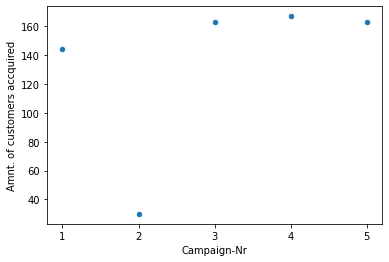

In [166]:
max_campaign = campaign_df_sum.loc[campaign_df_sum['successful_accquired_customers'].idxmax()]
print('Best campaign was nr: ' + str(max_campaign['Campaign-Nr']))
plt = campaign_df_sum.plot(kind='scatter', x='Campaign-Nr', y='successful_accquired_customers',
                           ylabel='Amnt. of customers accquired')
plt.set_xticks(range(1, 6))
print(campaign_df_sum)
print(plt)
